In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.copy("/content/MNIST_Dataset.zip","/content/drive/MyDrive/MNIST")

'/content/drive/MyDrive/MNIST/MNIST_Dataset.zip'

In [2]:
!unzip /content/drive/MyDrive/MNIST/MNIST_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: MNIST_Dataset/Y/train_59_02787.png  
  inflating: MNIST_Dataset/Y/train_59_02788.png  
  inflating: MNIST_Dataset/Y/train_59_02789.png  
  inflating: MNIST_Dataset/Y/train_59_02790.png  
  inflating: MNIST_Dataset/Y/train_59_02791.png  
  inflating: MNIST_Dataset/Y/train_59_02792.png  
  inflating: MNIST_Dataset/Y/train_59_02793.png  
  inflating: MNIST_Dataset/Y/train_59_02794.png  
  inflating: MNIST_Dataset/Y/train_59_02795.png  
  inflating: MNIST_Dataset/Y/train_59_02796.png  
  inflating: MNIST_Dataset/Y/train_59_02797.png  
  inflating: MNIST_Dataset/Y/train_59_02798.png  
  inflating: MNIST_Dataset/Y/train_59_02799.png  
  inflating: MNIST_Dataset/Y/train_59_02800.png  
  inflating: MNIST_Dataset/Y/train_59_02801.png  
  inflating: MNIST_Dataset/Y/train_59_02802.png  
  inflating: MNIST_Dataset/Y/train_59_02803.png  
  inflating: MNIST_Dataset/Y/train_59_02804.png  
  inflating: MNIST_Dataset/Y/train_59_02805.png  

In [3]:
!pip install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I am working on MNIST project I have databse of alphabets from A to Z. The MAIN is folder name MNIST_Dataset. And its has subfolders labels starting from A to Z. Each of the subfolder contain Like subfolder "A" contain images of A with different shapes. Similarly subfolder "B" contains images of B... that continue upto subfolder Z. 

100%|██████████| 2698/2698 [00:00<00:00, 6207.21it/s]


Epoch 1/10
5210/5210 [==============================] - 38s 7ms/step - loss: 0.4229 - accuracy: 0.8775 - val_loss: 0.1453 - val_accuracy: 0.9581
Epoch 2/10
5210/5210 [==============================] - 35s 7ms/step - loss: 0.2049 - accuracy: 0.9427 - val_loss: 0.1280 - val_accuracy: 0.9634
Epoch 3/10
5210/5210 [==============================] - 37s 7ms/step - loss: 0.1788 - accuracy: 0.9494 - val_loss: 0.1368 - val_accuracy: 0.9622
Epoch 4/10
5210/5210 [==============================] - 36s 7ms/step - loss: 0.1648 - accuracy: 0.9539 - val_loss: 0.1232 - val_accuracy: 0.9659
Epoch 5/10
5210/5210 [==============================] - 36s 7ms/step - loss: 0.1574 - accuracy: 0.9559 - val_loss: 0.1184 - val_accuracy: 0.9683
Epoch 6/10
5210/5210 [==============================] - 36s 7ms/step - loss: 0.1515 - accuracy: 0.9575 - val_loss: 0.1160 - val_accuracy: 0.9673
Epoch 7/10
5210/5210 [==============================] - 36s 7ms/step - loss: 0.1474 - accuracy: 0.9585 - val_loss: 0.1144 - val_ac

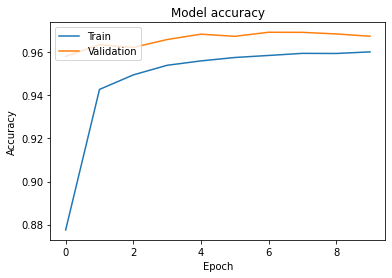

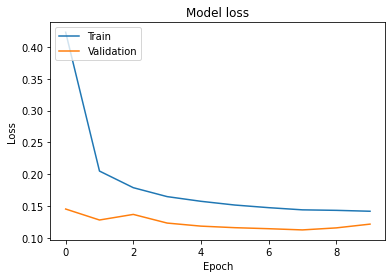

In [13]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tqdm import tqdm
from sklearn.model_selection import train_test_split


# Define datapath wher image data is stored
DATADIR = '/content/MNIST_Dataset/'
CATEGORIES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
IMG_SIZE = 28 # Resize the image size to train ML model

def load_data():
    data = [] # Defining empty dictionary to stored data extrcated from images
    # Loop through each category in CATEGORIES
    for category in CATEGORIES:
        
        # Get path to directory containing images for current category
        path = os.path.join(DATADIR, category) # /content/MNIST_Dataset/A
        
        # Get the numerical label for the current category
        class_num = CATEGORIES.index(category) # 0, 1, 2
        
        # Loop through each image in the current category directory
        for img in tqdm(os.listdir(path)):
            #print(img)
            try:
                # Load image using matplotlib and convert to grayscale
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                # Resize image to IMG_SIZE x IMG_SIZE using OpenCV
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                
                # Append the resized image and its numerical label to data list
                data.append([img_resized, class_num])
            except Exception as e:
                pass
    
    # Shuffle data to ensure training is not biased by category order
    np.random.shuffle(data)
    X = []
    y = []
    
    # Loop through each image and label in data list
    for features, label in data:
        X.append(features)
        y.append(label)
    
    # Convert X list to a numpy array and reshape to desired format
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
    # Convert X array to float32 type and scale pixel values to between 0 and 1
    X = X.astype('float32')
    X /= 255
    y = to_categorical(y) # Convert y list to categorical format using Keras utility function

    return X, y

X, y = load_data()

# Define the model
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, padding of 'same', ReLU activation,
# and input shape of (IMG_SIZE, IMG_SIZE, 1)
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))

# Add another convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))

# Add a max pooling layer with pool size of 2x2 to downsample the output of the convolutional layers
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a dropout layer with a rate of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# Add another convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))

# Add another convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))

# Add another max pooling layer with pool size of 2x2 to downsample the output of the convolutional layers
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another dropout layer with a rate of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a dense layer with 512 neurons and ReLU activation to introduce nonlinearity
model.add(Dense(512, activation='relu'))

# Add another dropout layer with a rate of 0.5 to reduce overfitting and make the model more generalizable
model.add(Dropout(0.5))

# Add the output layer with a softmax activation function and a number of neurons equal to the number of categories
model.add(Dense(len(CATEGORIES), activation='softmax'))

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with the fit() method, using a validation split of 0.2 and a batch size of 32
# Also, save TensorBoard logs to a specific directory for visualization purposes
NAME = "Char_Recognition"
tensorboard = TensorBoard(log_dir=f'logs/{NAME}')
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2, callbacks=[tensorboard])

# Plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

1303/1303 [==============================] - 4s 3ms/step - loss: 0.0856 - accuracy: 0.9749
Test loss: 0.08560215681791306
Test accuracy: 0.9749237895011902
